In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


(50000, 32, 32, 3)

In [ ]:
print(y_train.shape)

(50000, 1)


In [ ]:
y_test.shape

(10000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
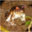

In [ ]:
X_train[0]

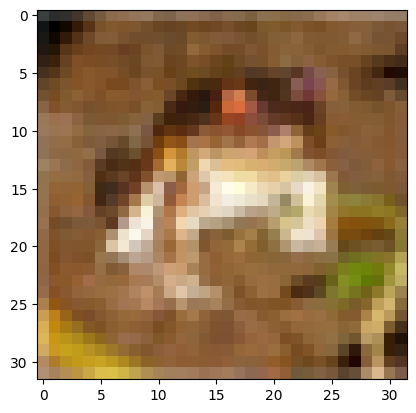

In [ ]:
plt.imshow(X_train[0])

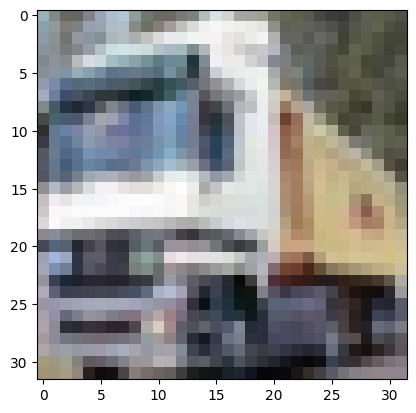

In [ ]:
plt.imshow(X_train[1])

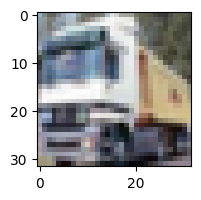

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

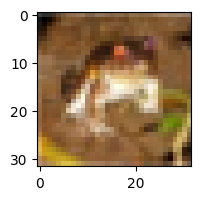

In [ ]:

plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

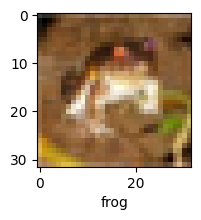

In [ ]:
plot_sample(X_train, y_train, 0)

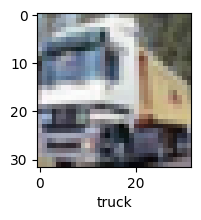

In [ ]:
plot_sample(X_train, y_train, 1)

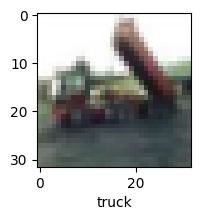

In [ ]:
plot_sample(X_train, y_train, 2)

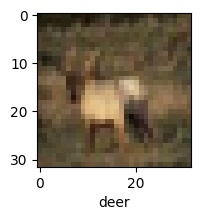

In [ ]:
plot_sample(X_train, y_train, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
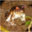

In [ ]:
X_train[0]

In [ ]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.3040 - loss: 1.9344
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.4188 - loss: 1.6441
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 81ms/step - accuracy: 0.4513 - loss: 1.5567
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 82ms/step - accuracy: 0.4758 - loss: 1.4906
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 82ms/step - accuracy: 0.4939 - loss: 1.4324


In [ ]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.4346 - loss: 1.5891


[1.5934135913848877, 0.4291999936103821]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report :\n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.39      0.68      0.49      1000
           1       0.67      0.41      0.51      1000
           2       0.38      0.20      0.27      1000
           3       0.36      0.28      0.31      1000
           4       0.31      0.56      0.40      1000
           5       0.54      0.20      0.29      1000
           6       0.40      0.70      0.51      1000
           7       0.66      0.35      0.46      1000
           8       0.43      0.70      0.54      1000
           9       0.74      0.22      0.34      1000

    accuracy                           0.43     10000
   macro avg       0.49      0.43      0.41     10000
weighted avg       0.49      0.43      0.41     10000



In [ ]:
cnn = models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(32, 32, 3)), # Changed Convo2D to Conv2D and added input_shape
    layers.MaxPooling2D((2,2)),
   layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - accuracy: 0.3983 - loss: 1.6614
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 44ms/step - accuracy: 0.6192 - loss: 1.0826
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.6809 - loss: 0.9190
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7199 - loss: 0.8049
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7532 - loss: 0.7109


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6917 - loss: 0.9457


[0.9493206143379211, 0.6880000233650208]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

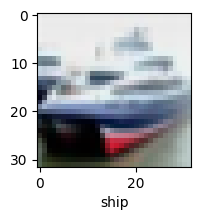

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


array([[6.84215978e-04, 1.50748383e-04, 1.33733982e-02, 8.18030596e-01,
        2.01195682e-04, 1.07584484e-01, 2.13742591e-02, 3.39908584e-04,
        3.05375718e-02, 7.72350887e-03],
       [1.19690094e-02, 7.04138339e-01, 5.84482004e-05, 4.08678898e-06,
        8.84753081e-06, 1.00227896e-06, 2.54912084e-05, 7.87901655e-08,
        2.63938457e-01, 1.98561288e-02],
       [2.76912808e-01, 9.87574160e-02, 5.26980776e-03, 3.67153017e-03,
        1.21447770e-02, 1.76457374e-03, 6.11403724e-04, 9.79501009e-03,
        5.38759530e-01, 5.23130186e-02],
       [7.92230129e-01, 2.71289120e-03, 6.86037913e-03, 1.67977050e-05,
        1.31755020e-03, 2.30157002e-06, 1.49952376e-03, 7.96793302e-06,
        1.95325479e-01, 2.70229139e-05],
       [5.09309117e-04, 6.30041992e-04, 2.13936809e-02, 6.64528906e-02,
        4.07569915e-01, 3.16405715e-03, 4.98952866e-01, 7.41515105e-05,
        1.05934241e-03, 1.93834640e-04]], dtype=float32)

In [ ]:
np.argmax([5,12,167,2])

np.int64(2)

In [ ]:
np.argmax(y_pred[0])

np.int64(3)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(1), np.int64(8), np.int64(0), np.int64(6)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

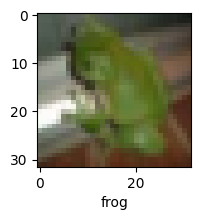

In [ ]:
plot_sample(X_test, y_test, 7)

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
classes[y_classes[7]]

'frog'

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71      1000
           1       0.75      0.84      0.79      1000
           2       0.59      0.55      0.57      1000
           3       0.55      0.49      0.51      1000
           4       0.67      0.58      0.62      1000
           5       0.63      0.56      0.59      1000
           6       0.78      0.75      0.76      1000
           7       0.69      0.79      0.74      1000
           8       0.83      0.75      0.79      1000
           9       0.71      0.79      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

